In [7]:
import h5py 
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from constants import INCLUDED_CHANNELS


In [15]:
# sample eeg recording path
EEG_DIR_PATH = '/storage/datasets_public/eeg_tuh_seizure/Preprocessed_TUH_SZ_v1.5.2/seizure_classification_clip_60/clipLen60_timeStepSize1'
EEG_FILE_NAME = '00013407_s001_t000.edf_0.h5'

In [16]:
# read eeg recording
sample_eeg_file_path = os.path.join(EEG_DIR_PATH, EEG_FILE_NAME)
with h5py.File(sample_eeg_file_path, 'r', locking=False) as hf:
    eeg_clip = hf['clip'][()]
eeg_clip.shape

(60, 19, 100)

In [11]:
sensor_ids = [x.split(' ')[-1] for x in INCLUDED_CHANNELS]
sensor_ids

['FP1',
 'FP2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'FZ',
 'CZ',
 'PZ']

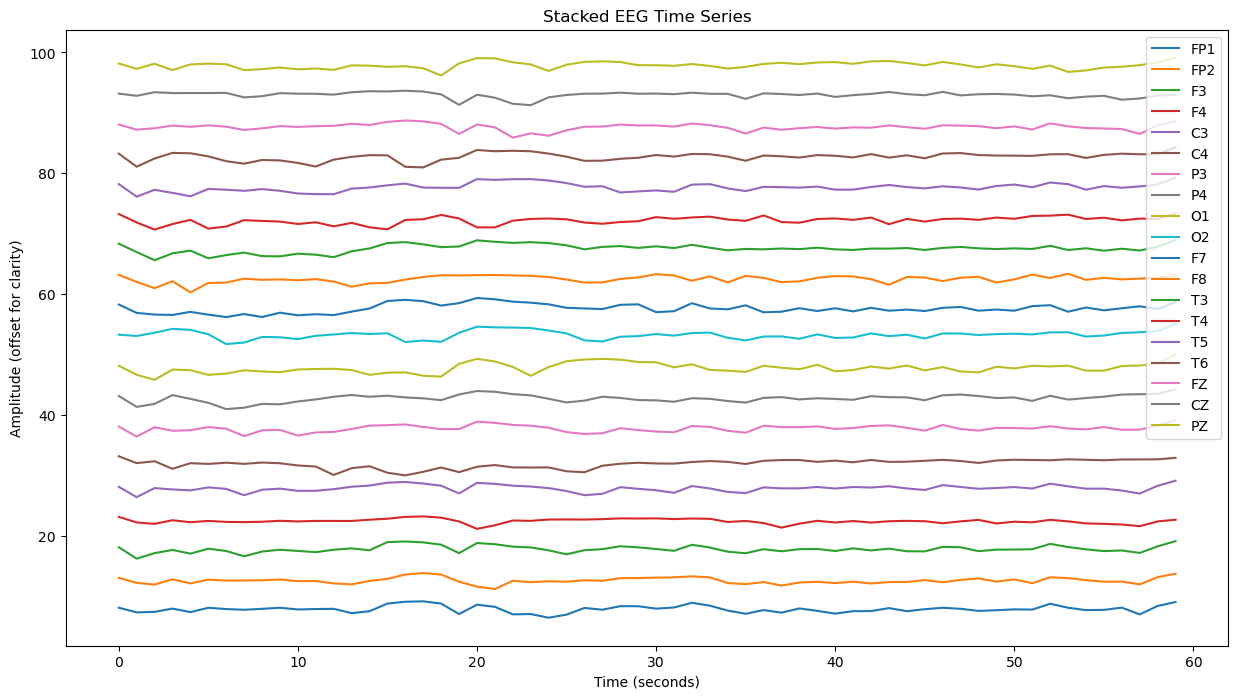

In [24]:
eeg_summarized = np.max(eeg_clip, axis=2)  # Shape will be (60, 19)

# Initialize figure
plt.figure(figsize=(15, 8))

# Offsetting each time series for clarity
offset_factor = 5  # Choose an appropriate offset factor
for i, label in enumerate(sensor_ids):
    plt.plot(eeg_summarized[:, i] + i * offset_factor, label=label)

plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (offset for clarity)')
plt.title('Stacked EEG Time Series')
plt.legend(loc='upper right')

plt.savefig('./figures/tmp/eeg_recording.png', dpi=300, bbox_inches='tight', transparent=True)